In [2]:
#Techniques for outlier detection and removal:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6131/2292542296.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

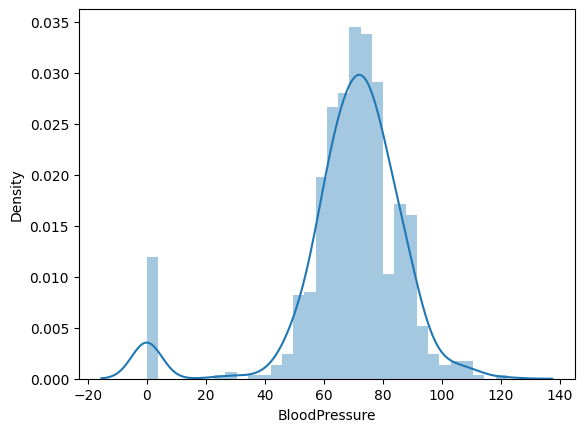

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')
df

sns.distplot(df['BloodPressure'])

Trimming

In [4]:
#Finding the Boundary Values
print("Highest allowed",df['BloodPressure'].mean() + 3*df['BloodPressure'].std())
print("Lowest allowed",df['BloodPressure'].mean() - 3*df['BloodPressure'].std())

Highest allowed 127.17289026193433
Lowest allowed 11.038047238065673


In [5]:
#Trimming of Outliers
new_df = df[(df['BloodPressure'] < 127.172890) & (df['BloodPressure'] > 11.038047)]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


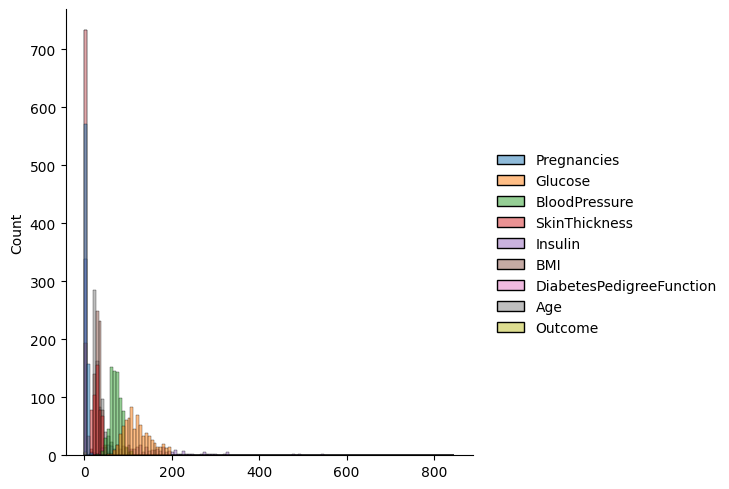

In [6]:
sns.displot(new_df)

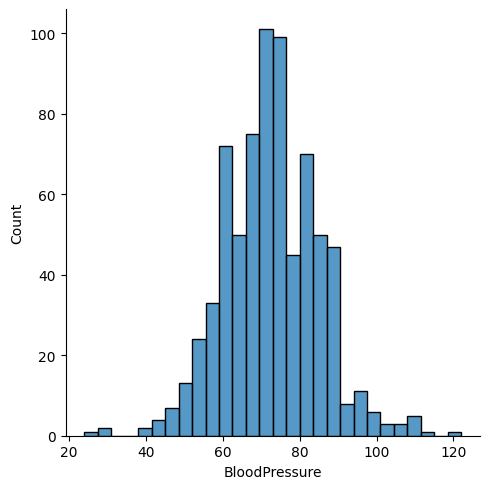

In [7]:
sns.displot(new_df['BloodPressure'])

/tmp/ipykernel_6131/4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

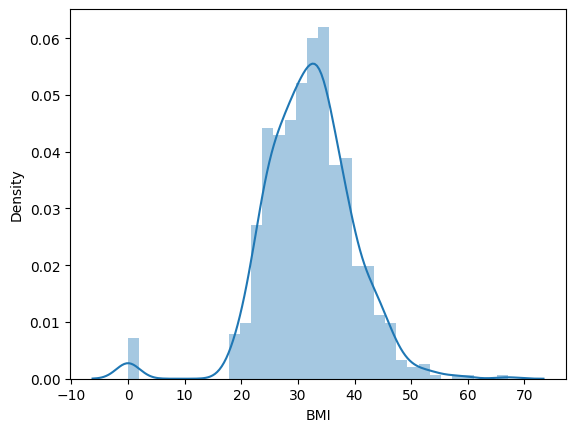

In [8]:
sns.distplot(df['BMI'])

In [9]:
#Finding the Boundary Values
print("Highest allowed",df['BMI'].mean() + 3*df['BMI'].std())
print("Lowest allowed",df['BMI'].mean() - 3*df['BMI'].std())

Highest allowed 55.64505908612634
Lowest allowed 8.340097163873661


In [10]:
#removing outlier
#Trimming of Outliers
BMI_ot = df[(df['BMI'] < 55.6450590) & (df['BMI'] > 8.3400971)]
BMI_ot

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/tmp/ipykernel_6131/526355671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BMI_ot)


<Axes: ylabel='Density'>

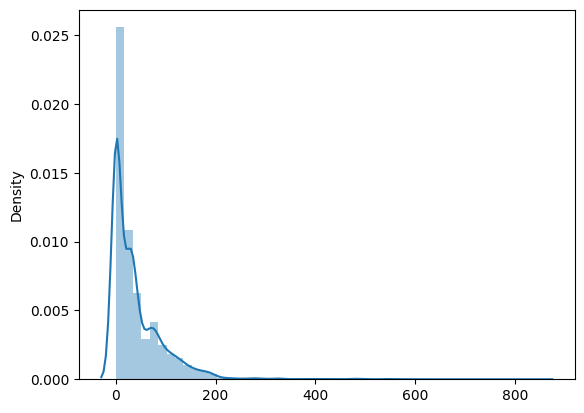

In [11]:
sns.distplot(BMI_ot)